What is AI bias?

AI bias is an anomaly in the output of machine learning algorithms. These could be due to the prejudiced assumptions made during the algorithm development process or prejudices in the training data.

What are the types of AI bias?

AI systems contain biases due to two reasons:

Cognitive biases: These are effective feelings towards a person or a group based on their perceived group membership. More than 180 human biases have been defined and classified by psychologists, and each can affect individuals we make decisions. These biases could seep into machine learning algorithms via either:


1.  designers unknowingly introducing them to the model
2. a training data set which includes those biases


Lack of complete data: If data is not complete, it may not be representative and therefore it may include bias. For example, most psychology research studies include results from undergraduate students which are a specific group and do not represent the whole population.


What are examples of AI bias?

Racial bias in healthcare risk algorithm

A health care risk-prediction algorithm that is used on more than 200 million U.S. citizens, demonstrated racial bias because it relied on a faulty metric for determining the need.

The algorithm was designed to predict which patients would likely need extra medical care, however, then it is revealed that the algorithm was producing faulty results that favor white patients over black patients.

The algorithm’s designers used previous patients’ healthcare spending as a proxy for medical needs. This was a bad interpretation of historical data because income and race are highly correlated metrics and making assumptions based on only one variable of correlated metrics led the algorithm to provide inaccurate results.

Bias in Facebook ads

There are numerous examples of human bias and we see that happening in tech platforms. Since data on tech platforms is later used to train machine learning models, these biases lead to biased machine learning models.

In 2019, Facebook was allowing its advertisers to intentionally target adverts according to gender, race, and religion. For instance,  women were prioritized in job adverts for roles in nursing or secretarial work, whereas job ads for janitors and taxi drivers had been mostly shown to men, in particular men from minority backgrounds.

As a result, Facebook will no longer allow employers to specify age, gender or race targeting in its ads.


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

 imported the dataset with Pandas

In [7]:
df = pd.read_csv('https://raw.githubusercontent.com/shrikant-temburwar/Loan-Prediction-Dataset/master/train.csv')

lets take a quick look at data

In [8]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


Data Exploration:

Next, lets take a closer look at the output variable, Loan_Status. In particular, we want to see the breakdown of the frequencies between its values:

In [9]:
class_counts= df['Loan_Status'].value_counts()
class_counts

,count
Loan_Status,
Y,422
N,192


Clearly, there is a significant imbalance between classes. Our model could easily end up highly biased towards the majority class (and in fact, if the model simply always predicts loan approval, it would already have around 72% accuracy with this data).

One possible approach to mitigate this would have been to use the SMOTE algorithm (Synthetic Minority Oversampling Technique) to upsample the minority with synthetic samples.

Frequency Table for Class distribution
Loan_Status
N    192
Y    422
Name: count, dtype: int64


<Axes: xlabel='Loan_Status'>

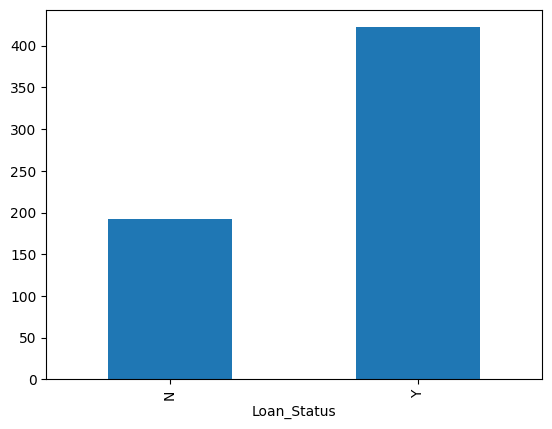

In [10]:
classDist = df['Loan_Status'].value_counts(ascending=True)
print ('Frequency Table for Class distribution')
print(classDist)
classDist.plot(kind='bar')

Lets do some more data exploration

Lets look at the Gender


In [11]:

df['Gender'].value_counts()

,count
Gender,
Male,489
Female,112


Clearly the data is bias becuase there are more male than female.

Frequency Table for Gender
Gender
Female    112
Male      489
Name: count, dtype: int64


<Axes: xlabel='Gender'>

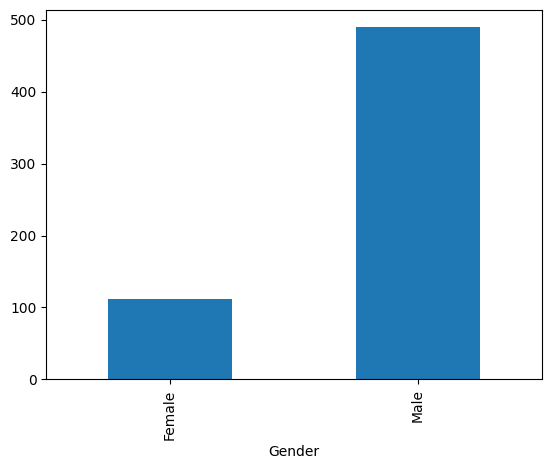

In [12]:
genderDist = df['Gender'].value_counts(ascending=True)
print ('Frequency Table for Gender')
print(genderDist)
genderDist.plot(kind='bar')

**males are more in number than female**

Lets look at the portion of male and female from the the loan status is either Yes or No

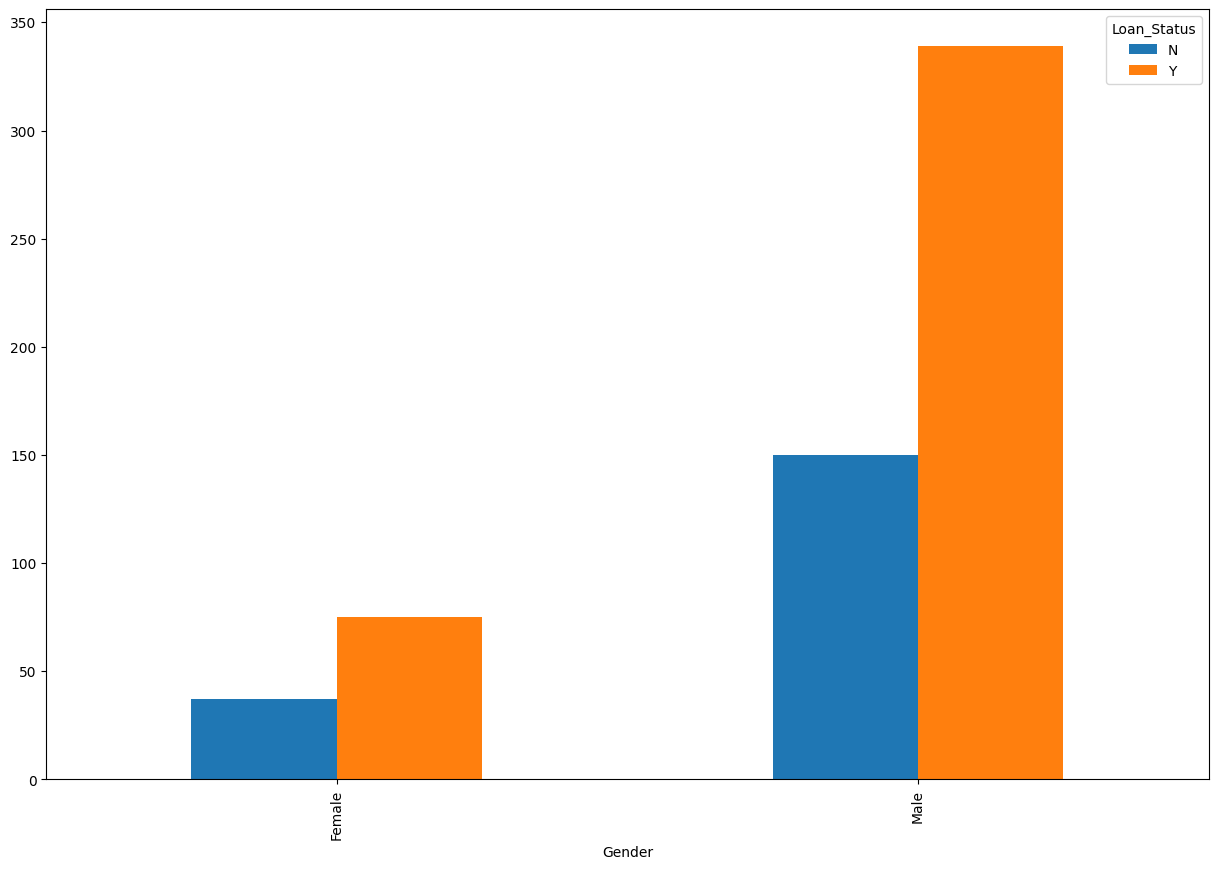

In [13]:
res = df.groupby(['Gender', 'Loan_Status']).size().unstack()
res.plot(kind='bar', figsize=(15,10))
plt.show()

**Again we see that the distribution is unfair becuase there are more males with Loan_status as Yes than females**

**Next lets see the relation of ApplicantIncome with Gender**


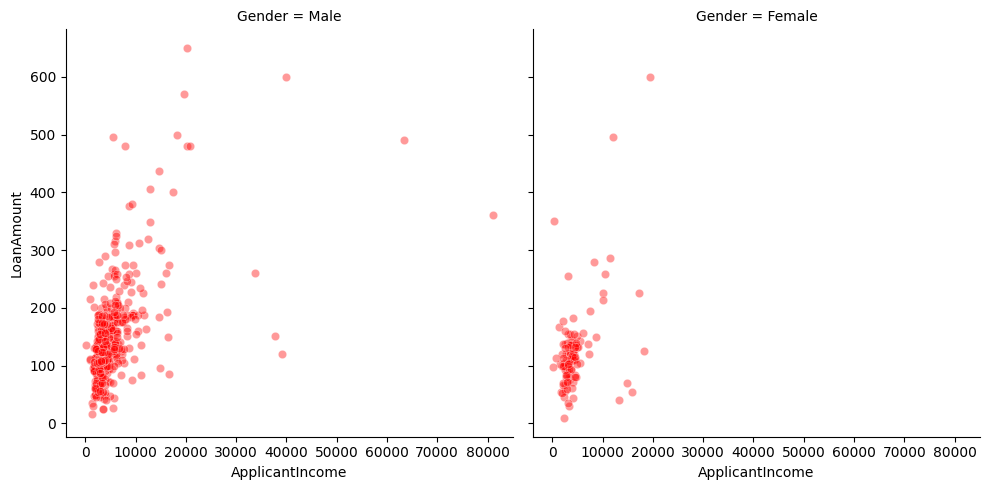

In [14]:
sns.relplot(x="ApplicantIncome", y="LoanAmount", data=df, col="Gender",color="Red",alpha=0.4)
plt.show()


Lets look at the eduction distribution of the applicants

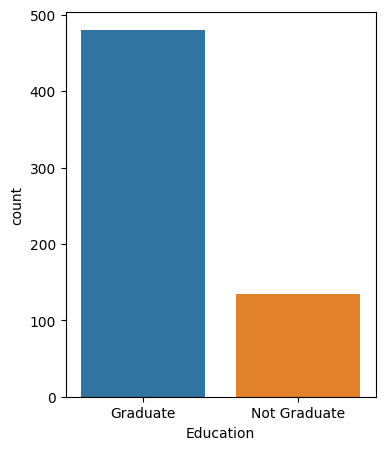

In [15]:
fig,ax=plt.subplots(figsize=(4,5))
sns.countplot(x = "Education", data=df, order = df["Education"].value_counts().index, hue="Education")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


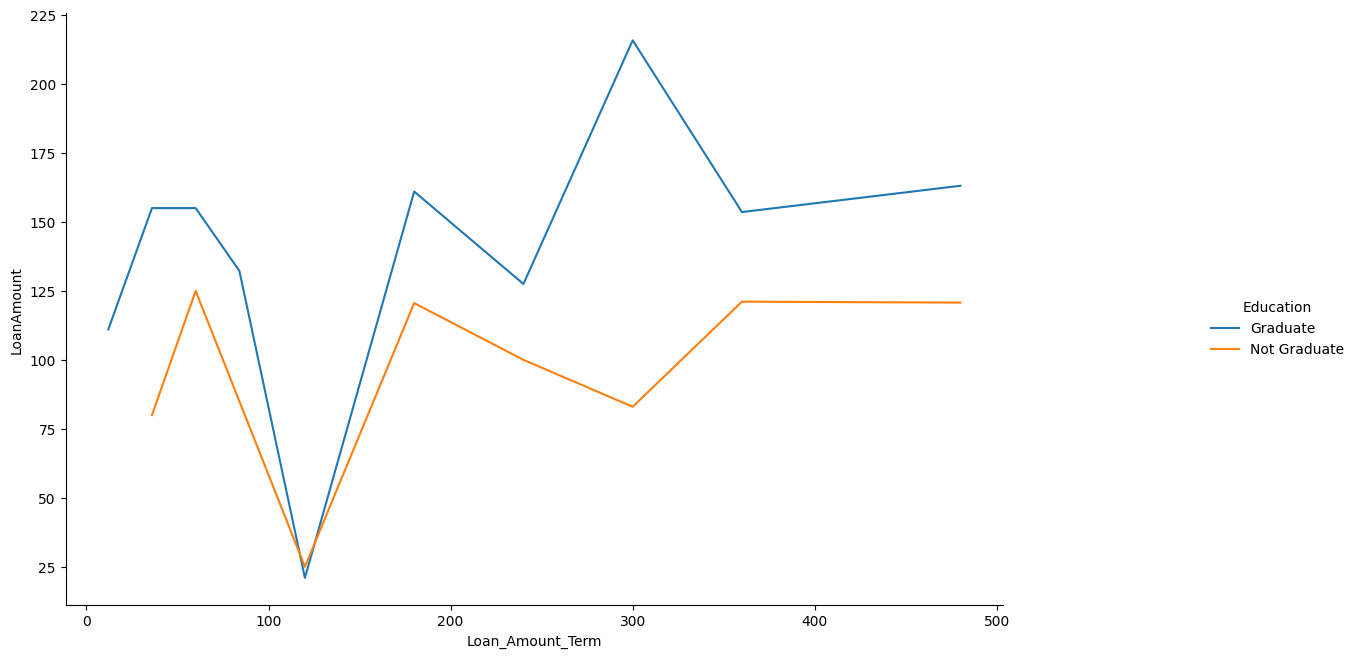

In [16]:
ggs=sns.relplot(x="Loan_Amount_Term", y="LoanAmount", data=df,kind="line",hue="Education",ci=None)
ggs.fig.set_size_inches(15,7)
plt.show()

**Again we see the bias in data, there are more graduate people in data**

lets look at the dependent cloumn

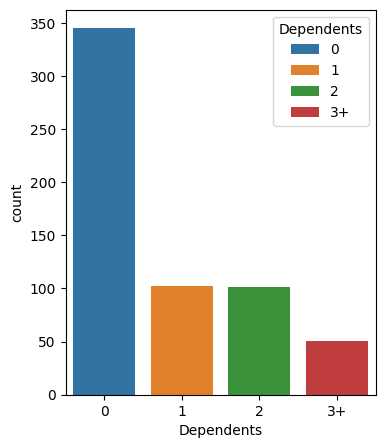

In [17]:
fig,ax=plt.subplots(figsize=(4,5))
sns.countplot(x = "Dependents", data=df, order = df["Dependents"].value_counts().index,hue="Dependents")
plt.show()

**Again the distribution is not fair. Clearly this data is not complete**

Lets look at the Loan_status distribution with dependents

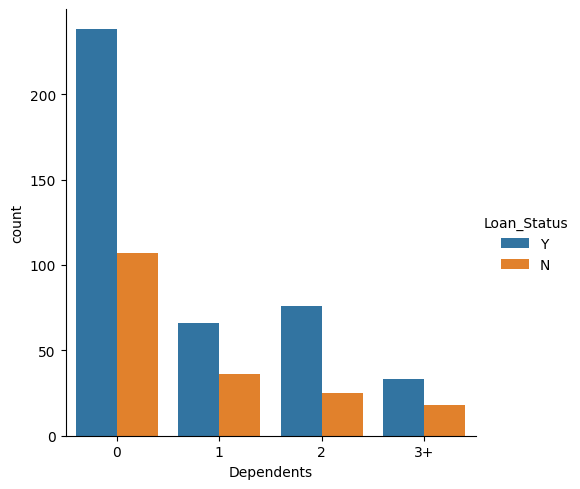

In [18]:
sns.catplot(x='Dependents',kind='count',data=df,hue='Loan_Status')

**The distribution is unfair**

Now lets take a look at the Married column

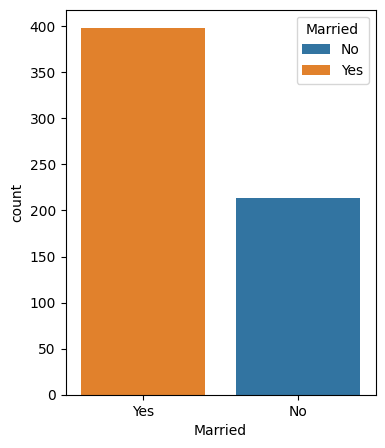

In [19]:
fig,ax=plt.subplots(figsize=(4,5))
sns.countplot(x = "Married", data=df, order = df["Married"].value_counts().index, hue='Married')
plt.show()

**We can clearly see the imbalance in the data above**

Lets count the vlaues for married column and then check the loan_status distribution for this column  

In [20]:
df.Married.value_counts()

,count
Married,
Yes,398
No,213


**This column has bias issue**

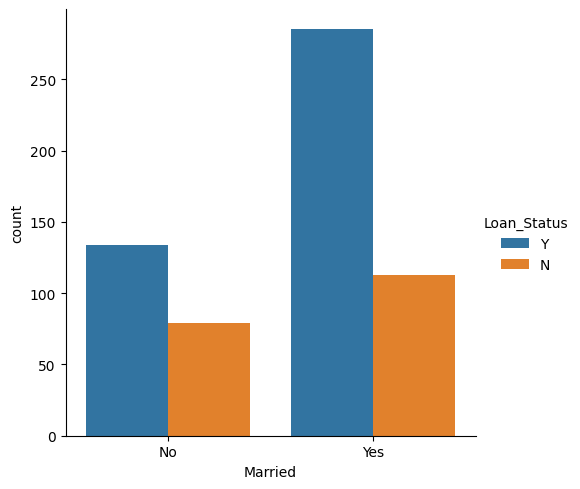

In [21]:
sns.catplot(x='Married',kind='count',data=df,hue='Loan_Status')

lets create another chart to understand the numbers better

Loan_Status    N    Y
Married              
No            79  134
Yes          113  285


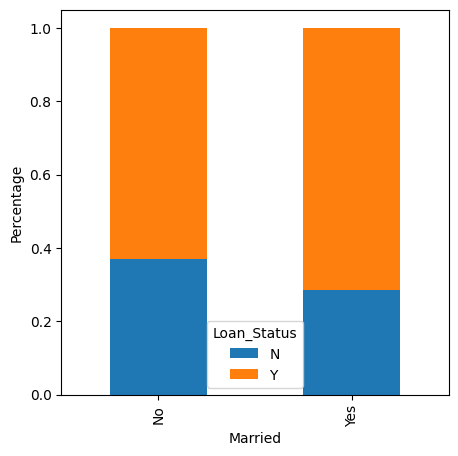

In [22]:
print(pd.crosstab(df["Married"],df["Loan_Status"]))
Married=pd.crosstab(df["Married"],df["Loan_Status"])
Married.div(Married.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(5,5))
plt.xlabel("Married")
plt.ylabel("Percentage")
plt.show()

Lets look into income column

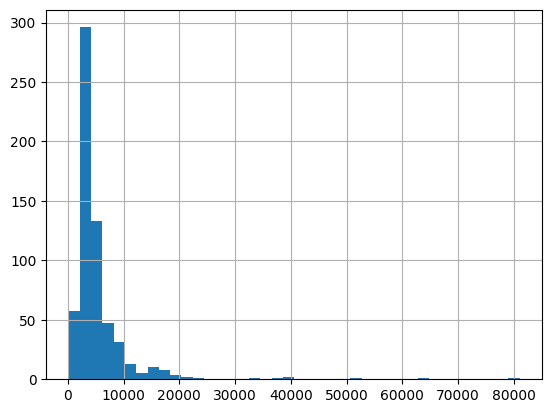

In [23]:
df['ApplicantIncome'].hist(bins=40)
plt.show()


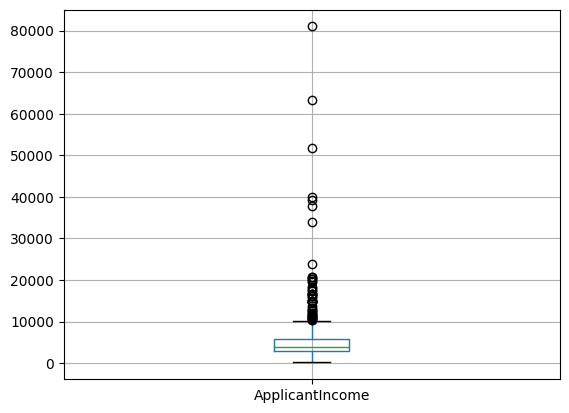

In [24]:
df.boxplot(column='ApplicantIncome')
plt.show()


In [25]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


Cleaning the Data

First, lets encode categorical features into binary representations through one hot encoding.
I manually encoded the Gender and Loan Status columns, since I wanted to keep them as one column each, respectively, and I used the pd.get_dummies function to convert the other categorical variables into indicator variables:

In [26]:
# Encode Male as 1, Female as 0
df.loc[df.Gender == 'Male', 'Gender'] = 1
df.loc[df.Gender == 'Female', 'Gender'] = 0


In [27]:
df.Gender

,Gender
0,1
1,1
2,1
3,1
4,1
...,...
609,0
610,1
611,1
612,1


In [28]:
# Encode Y Loan_Status as 1, N Loan_Status as 0
df["Loan_Status"] = df["Loan_Status"].map({'Y':1, 'N':0})


In [29]:
df.Loan_Status

,Loan_Status
0,1
1,0
2,1
3,1
4,1
...,...
609,1
610,1
611,1
612,1


In [30]:
# Replace the categorical values with the numeric equivalents that we have above
categoricalFeatures = ['Property_Area', 'Married', 'Dependents', 'Education', 'Self_Employed']
# Iterate through the list of categorical features and one hot encode them.
for feature in categoricalFeatures:
    onehot = pd.get_dummies(df[feature], prefix=feature)
    df = df.drop(feature, axis=1)
    df = df.join(onehot)

In [31]:
df

,Loan_ID,Gender,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,...,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes
0,LP001002,1,5849,0.0,NaN,360.0,1.0,1,False,False,...,True,False,True,False,False,False,True,False,True,False
1,LP001003,1,4583,1508.0,128.0,360.0,1.0,0,True,False,...,False,True,False,True,False,False,True,False,True,False
2,LP001005,1,3000,0.0,66.0,360.0,1.0,1,False,False,...,False,True,True,False,False,False,True,False,False,True
3,LP001006,1,2583,2358.0,120.0,360.0,1.0,1,False,False,...,False,True,True,False,False,False,False,True,True,False
4,LP001008,1,6000,0.0,141.0,360.0,1.0,1,False,False,...,True,False,True,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,2900,0.0,71.0,360.0,1.0,1,True,False,...,True,False,True,False,False,False,True,False,True,False
610,LP002979,1,4106,0.0,40.0,180.0,1.0,1,True,False,...,False,True,False,False,False,True,True,False,True,False
611,LP002983,1,8072,240.0,253.0,360.0,1.0,1,False,False,...,False,True,False,True,False,False,True,False,True,False
612,LP002984,1,7583,0.0,187.0,360.0,1.0,1,False,False,...,False,True,False,False,True,False,True,False,True,False


Lets find correlation between the columns

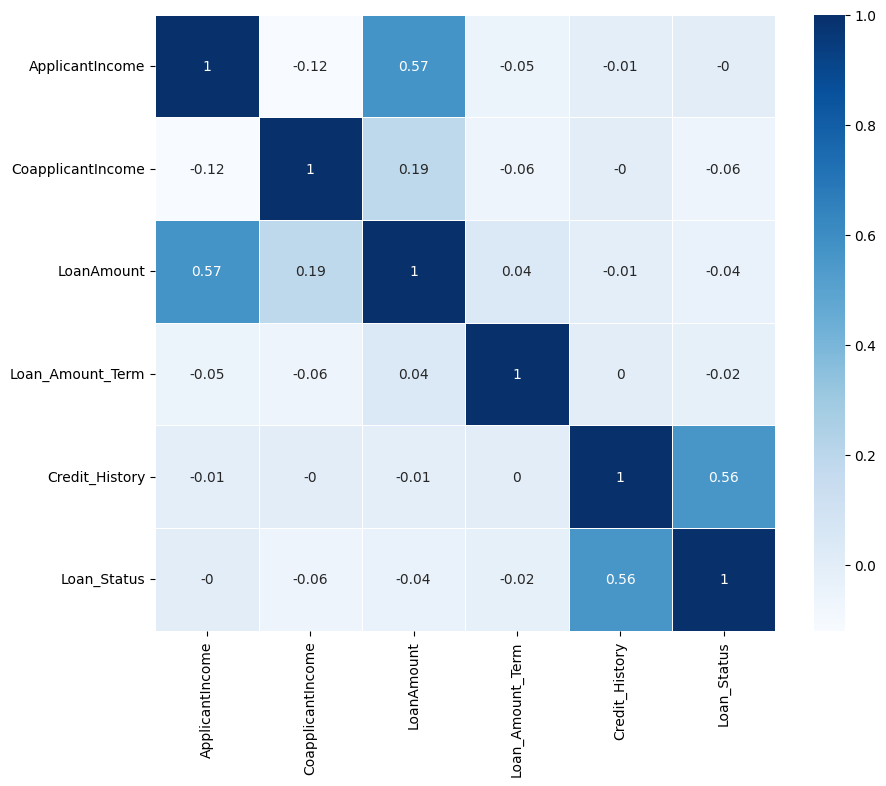

In [32]:
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr().round(2)

# Create the heatmap
plt.figure(figsize=(10, 8))  # Optional: Adjust the figure size if needed
sns.heatmap(data=corr_matrix, annot=True, linewidths=0.5, cmap="Blues")
plt.show()

#fig,ax=plt.subplots(figsize=(15,8))
#sns.heatmap(data=df.corr().round(2),annot=True,linewidths=0.5,cmap="Blues")
#plt.show()

Lets check the missing values

In [33]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14
Credit_History,50
Loan_Status,0
Property_Area_Rural,0
Property_Area_Semiurban,0


Lets replace the missing values of loanAmount and LoanAmountTerm with the mean values of the cloumns

In [34]:
df.LoanAmount.fillna(df.LoanAmount.mean(),inplace=True)
df.Loan_Amount_Term.fillna(df.Loan_Amount_Term.mean(),inplace=True)

lets check the missing values again

In [35]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,50
Loan_Status,0
Property_Area_Rural,0
Property_Area_Semiurban,0


lets drop the other values with missing records

In [36]:
df.dropna(how="any",inplace=True)

lets check the data again

In [37]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0
Loan_Status,0
Property_Area_Rural,0
Property_Area_Semiurban,0


How to fix biases in machine learning algorithms?

Firstly, if your data set is complete, you should acknowledge that AI biases can only happen due to the prejudices of humankind and you should focus on removing those prejudices from the data set. However, it is not as easy as it sounds.

A naive approach is removing protected classes (such as sex or race) from data is to delete the labels that make the algorithm bias, yet, this approach may not work because removed labels may affect the understanding of the model and your results’ accuracy may get worse.

So there are no quick fixes to removing all biases but there are high level recommendations that one can apply to overcome the issue.



In [38]:
pip install imbalanced-learn


In [39]:
from imblearn.over_sampling import SMOTE


In [42]:
# Drop Loan_ID column as it's irrelevant to our prediction
X = df.drop(['Loan_ID', 'Loan_Status'], axis=1)  # Drop target as well for features
y = df['Loan_Status']  # Target variable


In [43]:
# One-hot encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)  # drop_first=True to avoid multicollinearity


ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                 15
Loan_Amount_Term           11
Credit_History             32
Gender_Male                 0
Married_Yes                 0
Dependents_1                0
Dependents_2                0
Dependents_3+               0
Education_Not Graduate      0
Self_Employed_Yes           0
Property_Area_Semiurban     0
Property_Area_Urban         0
dtype: int64
Original class distribution:
Loan_Status
Y    302
N    127
Name: count, dtype: int64
Resampled class distribution:
Loan_Status
N    302
Y    302
Name: count, dtype: int64


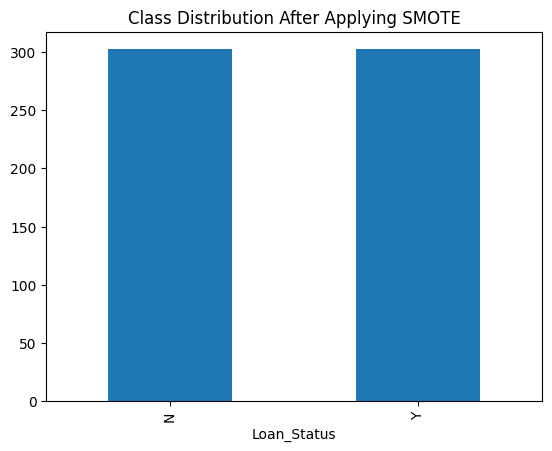

In [45]:
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Drop the Loan_ID column
X = df.drop(['Loan_ID', 'Loan_Status'], axis=1)
y = df['Loan_Status']

# One-hot encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Check for missing values
print(X_train.isnull().sum())

# Impute missing values
imputer = SimpleImputer(strategy='mean')  # Impute with the mean for numerical columns
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Apply SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_imputed, y_train)

# Check class distribution after SMOTE
print(f"Original class distribution:\n{y_train.value_counts()}")
print(f"Resampled class distribution:\n{y_train_res.value_counts()}")

# Visualize the class distribution
y_train_res.value_counts().plot(kind='bar')
plt.title('Class Distribution After Applying SMOTE')
plt.show()


<ipython-input-46-a9f0e3baef23>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_res, palette="Blues")


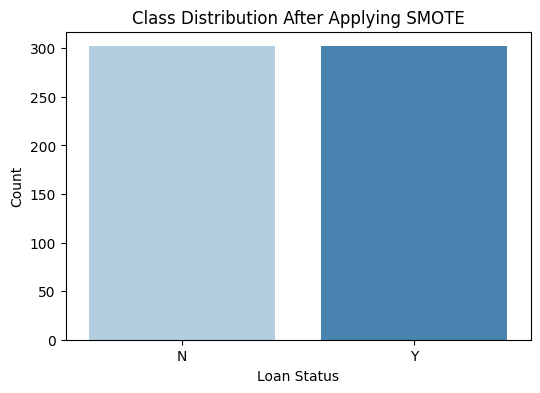

In [46]:
import seaborn as sns

# Visualize the class distribution using a bar plot
plt.figure(figsize=(6,4))
sns.countplot(x=y_train_res, palette="Blues")
plt.title('Class Distribution After Applying SMOTE')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()


In [47]:
from imblearn.under_sampling import RandomUnderSampler


In [48]:
# Apply Random Undersampling
rus = RandomUnderSampler(random_state=42)
X_train_res, y_train_res = rus.fit_resample(X_train, y_train)

print(f"Original class distribution:\n{y_train.value_counts()}")
print(f"Resampled class distribution:\n{y_train_res.value_counts()}")


Original class distribution:
Loan_Status
Y    302
N    127
Name: count, dtype: int64
Resampled class distribution:
Loan_Status
N    127
Y    127
Name: count, dtype: int64


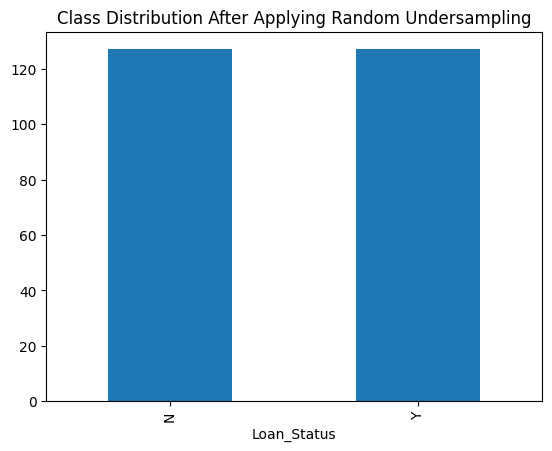

In [49]:
y_train_res.value_counts().plot(kind='bar')
plt.title('Class Distribution After Applying Random Undersampling')
plt.show()


In [51]:
# Check available columns in X_encoded
print(X_encoded.columns)


Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Male', 'Married_Yes',
       'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban'],
      dtype='object')


ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                 15
Loan_Amount_Term           11
Credit_History             32
Gender_Male                 0
Married_Yes                 0
Dependents_1                0
Dependents_2                0
Dependents_3+               0
Education_Not Graduate      0
Self_Employed_Yes           0
Property_Area_Semiurban     0
Property_Area_Urban         0
dtype: int64
Original class distribution:
Loan_Status
Y    302
N    127
Name: count, dtype: int64
Resampled class distribution:
Loan_Status
N    127
Y    127
Name: count, dtype: int64


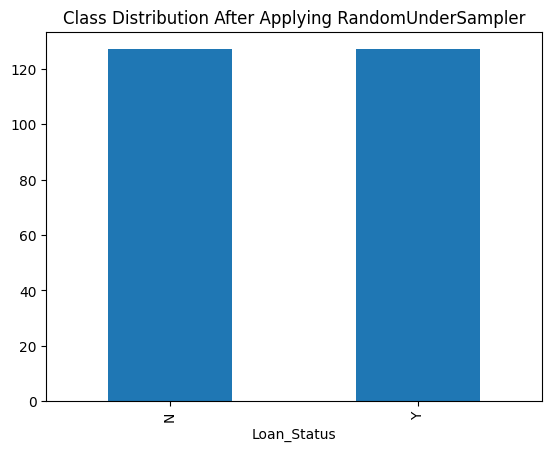

<ipython-input-52-e339a310c14e>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender_Male', data=pd.DataFrame(X_train_res, columns=X_train.columns), palette='Set2')


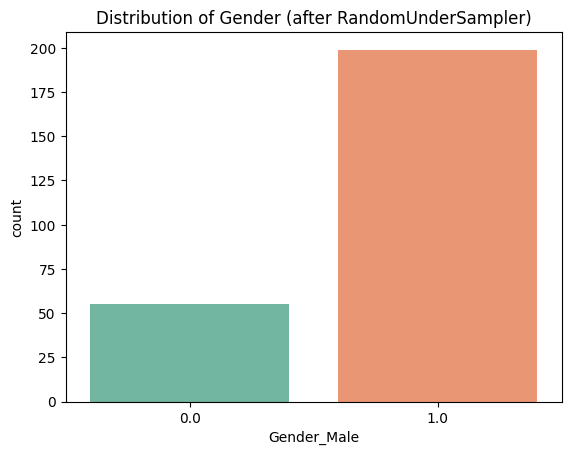

<ipython-input-52-e339a310c14e>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Credit_History', data=pd.DataFrame(X_train_res, columns=X_train.columns), palette='Set2')


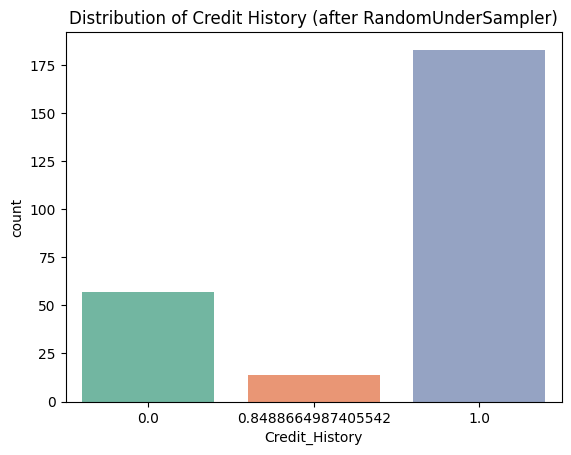

In [52]:
from sklearn.impute import SimpleImputer
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Drop the Loan_ID column
X = df.drop(['Loan_ID', 'Loan_Status'], axis=1)
y = df['Loan_Status']

# One-hot encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Check for missing values
print(X_train.isnull().sum())

# Impute missing values
imputer = SimpleImputer(strategy='mean')  # Impute with the mean for numerical columns
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Apply RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_train_res, y_train_res = rus.fit_resample(X_train_imputed, y_train)

# Check class distribution after RandomUnderSampler
print(f"Original class distribution:\n{y_train.value_counts()}")
print(f"Resampled class distribution:\n{y_train_res.value_counts()}")

# Visualize the new class distribution after undersampling
y_train_res.value_counts().plot(kind='bar')
plt.title('Class Distribution After Applying RandomUnderSampler')
plt.show()

# Visualize the distribution of gender (using 'Gender_Male')
sns.countplot(x='Gender_Male', data=pd.DataFrame(X_train_res, columns=X_train.columns), palette='Set2')
plt.title('Distribution of Gender (after RandomUnderSampler)')
plt.show()

# Visualize the distribution of Credit History
sns.countplot(x='Credit_History', data=pd.DataFrame(X_train_res, columns=X_train.columns), palette='Set2')
plt.title('Distribution of Credit History (after RandomUnderSampler)')
plt.show()
